<a href="https://colab.research.google.com/github/earo12/FRAUD_PROJECT/blob/main/FRAUD_PROJECT_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First I'll begin with importing all the libraries recquired for this project:

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option ('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

#### Next, I'll check all the information available within the dataset:

In [36]:
df = pd.read_csv('/content/Stori_Data_Challenge_2021..csv')

In [37]:
df.head()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [38]:
df.isnull().sum().sort_values(ascending = False)

minimum_payments                    321
cash_advance                        112
activated_date                       13
last_payment_date                     9
balance                               2
credit_limit                          1
Unnamed: 0                            0
cash_advance_frequency                0
tenure                                0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cust_id                               0
purchases_frequency                   0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
fraud                                 0
dtype: int64

In [39]:
#First I'll drop columns I think we're not use like "Unamed 0" or "cust_id"
df = df.drop(columns = 'Unnamed: 0')
df = df.drop(columns = 'cust_id')

# Question 1)



## 1.1 Plot an histogram of the balance amount for all the customers.

In [40]:
# I'll use the same method with other null values we checked earlier:

balance_mean = df['balance'].mean()

# And after, I'll use them in the same column in order to don't have null values anymore:
df['balance'].fillna(balance_mean, inplace=True)

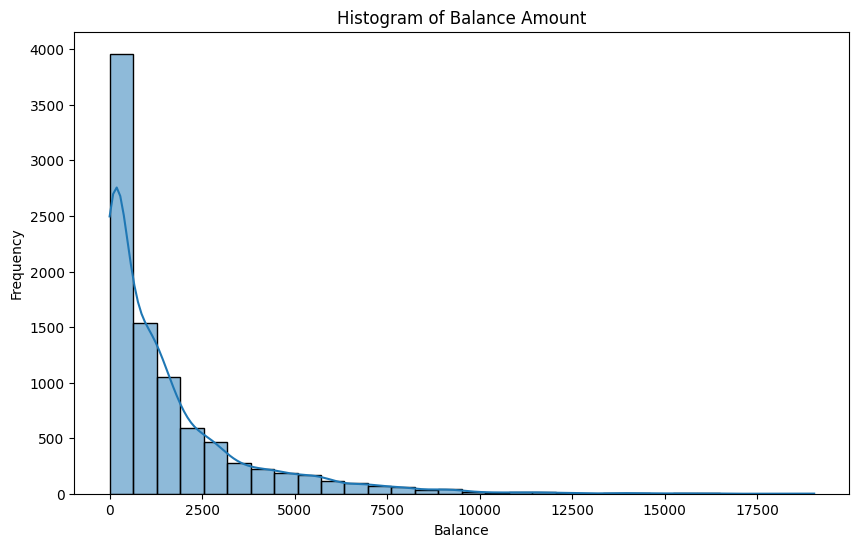

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', bins=30, kde=True)
plt.title('Histogram of Balance Amount')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

## 1.2 Report any structure you find and any hypotheses you have about that structure.

In [42]:
# Since many fields have null values, I'll be using the same technique in order to fill them

mean_min_payments = df['minimum_payments'].mean()
mean_cash_advance = df['cash_advance'].mean()
mean_credit_limit = df['credit_limit'].mean()

# Once again we fill the values
df['minimum_payments'].fillna(mean_min_payments, inplace=True)
df['cash_advance'].fillna(mean_cash_advance, inplace=True)
df['credit_limit'].fillna(mean_credit_limit, inplace=True)


In [44]:
df.columns

Index(['activated_date', 'last_payment_date', 'balance', 'balance_frequency',
       'purchases', 'oneoff_purchases', 'installments_purchases',
       'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure', 'fraud'],
      dtype='object')

In [45]:
# In order to check any structure, we can follow many ways, we can visualize each variable
# See if there's a correlation between each field
# I will plot a heat map in order to see wether there is a correlation between the variables
# In order to achieve that, I have to discard momentaneously the dates fields, I'm not going to drop them, so I'll define another variable

df_plot = df[['balance', 'balance_frequency','purchases', 'oneoff_purchases', 'installments_purchases','cash_advance', 'purchases_frequency',
              'oneoff_purchases_frequency','purchases_installments_frequency', 'cash_advance_frequency','cash_advance_trx', 'purchases_trx',
               'credit_limit', 'payments','minimum_payments', 'prc_full_payment', 'tenure', 'fraud']]

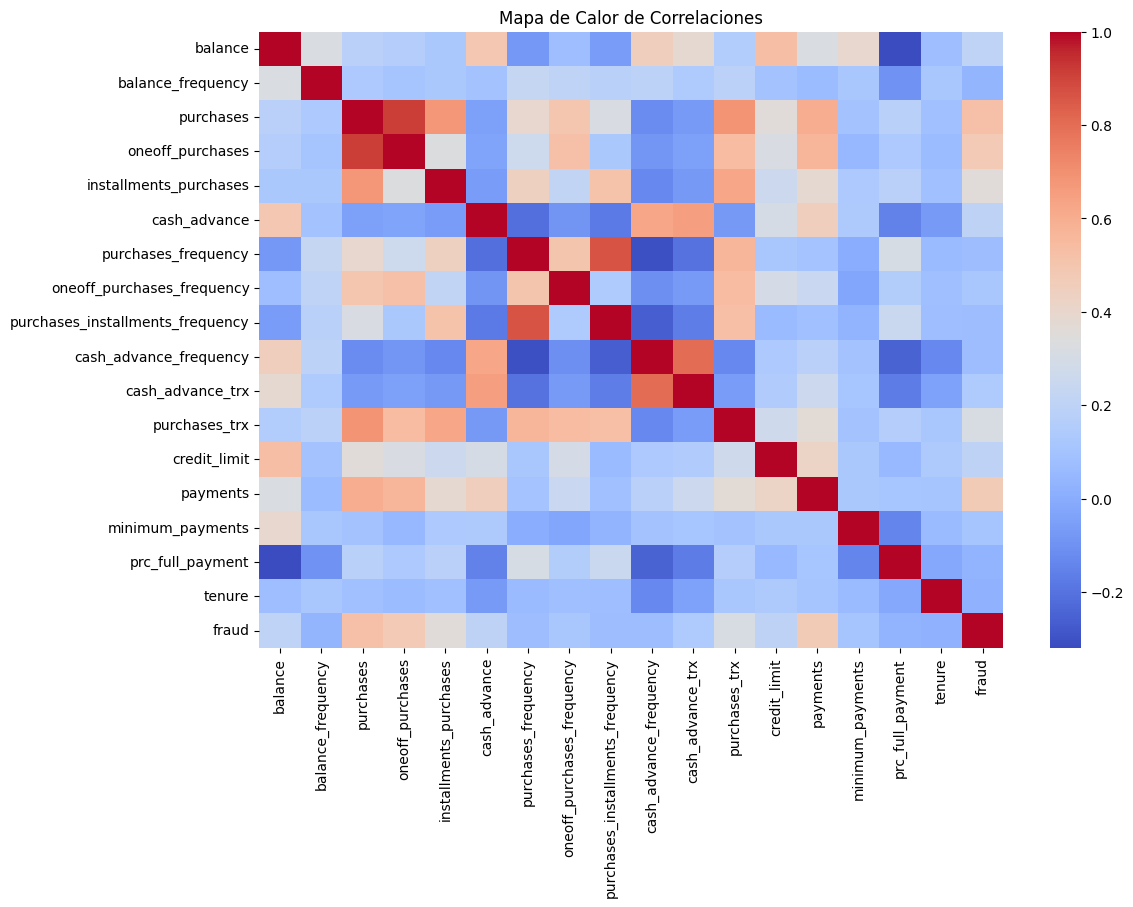

In [49]:
correlation_matrix = df_plot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()